In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS ,cross_val_score as CSV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn

    0   1
0  41   2
1   7  15


Text(0.5, 15.0, 'Predict Value')

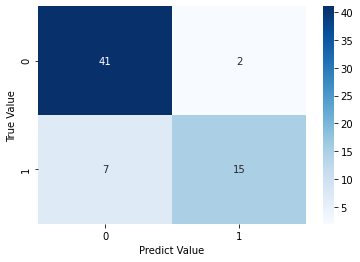

In [3]:
df =pd.read_csv('GDM_data.csv')
N =8
X = df.iloc[:,1:N]
y = df.iloc[:,11]
X_train,X_test,y_train,y_test = TTS (
    X,y,test_size = 0.15,random_state = 9,stratify = y)

GBC = GradientBoostingClassifier(learning_rate=0.3, max_depth=2, max_features=0.2, min_samples_leaf=8, 
                                  min_samples_split=6, n_estimators=20, subsample=0.6,random_state=16)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X)
con=confusion_matrix(y,y_pred)
con = pd.DataFrame(con)
print(con)
#xticks = ['Insensitive to ${NO_2}$','Sensitive to ${NO_2}$']
#yticks = ['Insensitive to ${NO_2}$','Sensitive to ${NO_2}$']
shp = sn.heatmap(con,annot=True,cmap='Blues')
                 #,xticklabels=xticks,yticklabels=yticks)
shp.set_ylabel('True Value')
shp.set_xlabel('Predict Value')
